# Greetings
The [data](https://www.kaggle.com/datasets/osmi/mental-health-in-tech-2016/) used in this notebook is the results of a survey, which were conducted amongst technology-oriented employees back in 2016.

## Data Pre-processing 
In this section, we make advantage of the findings of the Exploratory Data Analysis (EDA) to fix the problems occurring in the dataset. Subsequently, we'll delve into encoding the data to prepare it for clustering in the next phase.

### List of contents :
1. __Data Cleaning__ 
2. __Features Encoding__
3. __Summary__

Importing the required libraries

In [1]:
# Path library for generating OS paths efficiently
from pathlib import Path

# Data analysis library
import pandas as pd

# Python library for numerical computation 
import numpy as np

# Powerful data visualization library
import seaborn as sns
sns.set_theme(style="whitegrid")

# The base library for plotting graphs in python
import matplotlib.pyplot as plt

First, let's start by loading the data. 

In [2]:
# Formulating the directory 
path = Path.cwd().parent

# Loading the data
data = pd.read_csv(f'{path}/data/mental-heath-in-tech-2016_20161114.csv')

# Displaying the data
data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [3]:
print(f"The data is formed through {data.shape[1]} columns/features and {data.shape[0]} rows/records.")

The data is formed through 63 columns/features and 1433 rows/records.


#### 1. Data Cleaning
Numerous problems were discovered within the dataset such as missing and erroneous data and even inadequate data for the purpose of our case study. 
In this phase, we proceed to clean the data.

We'll start by renaming the columns into short names instead of large questions.

In [4]:
# Here are the new names of the columns 
new_columns_names = [
    'is_self_employed',  # Are you self-employed?
    'organization_size',  # How many employees does your company or organization have?
    'is_tech_company',  # Is your employer primarily a tech company/organization?
    'is_tech_role',  # Is your primary role within your company related to tech/IT? 
    'is_mh_benefits_provided',  # Does your employer provide mental health benefits as part of healthcare coverage?
    'is_aware_mh_care_available', # Do you know the options for mental health care available under your employer-provided coverage?
    'is_mh_discussed_by_employer', # Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
    'is_mh_resources_provided_by_employer', # Does your employer offer resources to learn more about mental health concerns and options for seeking help?
    'is_anonymity_protected', # Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
    'how_is_asking_for_medical_leave_due_to_mhi', # If a mental health issue prompted you to request a medical leave from work, asking for that leave would be 
    'is_discussing_mhd_with_employer_have_negative_consequences', # Do you think that discussing a mental health disorder with your employer would have negative consequences?
    'is_discussing_phd_with_employer_have_negative_consequences', # Do you think that discussing a physical health disorder with your employer would have negative consequences?
    'is_willing_to_discuss_mhi_with_colleagues', # Would you feel comfortable discussing a mental health disorder with your coworkers?
    'is_willing_to_discuss_mhi_with_direct_supervisor', # Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?
    'is_employer_takes_mh_seriously', # Do you feel that your employer takes mental health as seriously as physical health?
    # Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?
    'is_aware_of_previous_negative_consequence_of_colleagues_with_mhi',
    # Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?
    'have_medical_coverage_includes_mental_health_issue',
    # Do you know local or online resources to seek help for a mental health disorder?
    'know_how_to_seek_help',
    # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?
    'is_able_to_reveal_previous_mental_health_issue_to_business_contacts',
    # If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?
    'is_impacted_negatively_1',
    # If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?
    'is_able_to_reveal_previous_mental_health_issue_to_coworkers',
    # If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?
    'is_impacted_negatively_2',
    # Do you believe your productivity is ever affected by a mental health issue?
    'is_productivity_impacted',
    # If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?
    'percentage_impacted',
    # Do you have previous employers?
    'is_previously_employed',
    # Have your previous employers provided mental health benefits?
    'is_previous_employer_provides_mh_benefits',
    # Were you aware of the options for mental health care provided by your previous employers?
    'is_aware_mh_options_by_previous_employer',
    # Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
    'is_mh_discussed_by_previous_employer',
    # Did your previous employers provide resources to learn more about mental health issues and how to seek help?
    'is_mh_resources_provided_by_previous_employer',
    # Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?
    'is_anonymity_protected_by_previous_employer',
    # Do you think that discussing a mental health disorder with previous employers would have negative consequences?
    'is_discussing_mhd_with_previous_employer_have_negative_consequences',
    # Do you think that discussing a physical health disorder with previous employers would have negative consequences?
    'is_discussing_phd_with_previous_employer_have_negative_consequences',
    # Would you have been willing to discuss a mental health issue with your previous co-workers?
    'is_willing_to_discuss_mhi_with_previous_colleagues',
    # Would you have been willing to discuss a mental health issue with your direct supervisor(s)?
    'is_willing_to_discuss_mhi_with_previous_direct_supervisor',
    # Did you feel that your previous employers took mental health as seriously as physical health?
    'is_previous_employer_takes_mh_seriously',
    # Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?
    'is_aware_of_previous_negative_consequence_of_colleagues_with_mhi_in_previous_workplace',
    'is_willing_to_bring_phi_in_interview', # Would you be willing to bring up a physical health issue with a potential employer in an interview?
    'why_or_why_not_bring_phi_in_interview',  # Why or why not?
    'is_willing_to_bring_mhi_in_interview', # Would you bring up a mental health issue with a potential employer in an interview?
    'why_or_why_not_bring_mhi_in_interview',  # Why or why not?
    'is_being_identified_with_mhi_would_hurt_your_career', # Do you feel that being identified as a person with a mental health issue would hurt your career?
    'is_being_identified_with_mhi_would_lower_your_status_among_colleagues', # Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
    'is_wiling_to_share_about_mhi', # How willing would you be to share with friends and family that you have a mental illness?
    # Have you observed or experienced an unsupported or badly handled response to a mental health issue in your current or previous workplace?
    'previously_observed_experienced_response_to_mhi',
    # Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?
    'is_less_encouraged_to_reveal_mhi',
    'family_history_of_mhi',  # Do you have a family history of mental illness?
    'previous_history_of_mhi',  # Have you had a mental health disorder in the past?
    'is_having_mhd',  # Do you currently have a mental health disorder?
    'known_conditions',  # If yes, what condition(s) have you been diagnosed with?
    'suspected_conditions',  # If maybe, what condition(s) do you believe you have?
    'diagnosed_by_professional',  # Have you been diagnosed with a mental health condition by a medical professional?
    'diagnosed_conditions_by_professional',  # If so, what condition(s) were you diagnosed with?
    'is_sought_treatment_for_mhi', # Have you ever sought treatment for a mental health issue from a mental health professional?
    'is_mhi_interferes_with_your_work_when_treated_effectively', # If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?
    'is_mhi_does_not_interfere_with_your_work_when_treated_effectively', # If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?
    'age',  # What is your age? 
    'gender',  # What is your gender?
    'country_of_residency',  # What country do you live in?'
    'us_state_residency',  # What US state or territory do you live in?
    'country_of_work',  # What country do you work in?
    'us_state_work',  # What US state or territory do you work in?
    'role_description',  # Which of the following best describes your work position?
    'is_remote'  # Do you work remotely?
]

# Setting the columns names in df
data.columns = new_columns_names
data.head()

,is_self_employed,organization_size,is_tech_company,is_tech_role,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


#### 1.1 Slicing the data 
As discussed, we only need to keep the data from employees and not self-employed. This would leave the feature useless, therefore, we'll remove it as well.

In [5]:
# Keeping only the rows containing data about employees
raw_df = data[data["is_self_employed"] == 0]

# Removing the feature
df = raw_df.drop(columns=["is_self_employed"], axis=1)

# Overview of the new data
df.head()

,organization_size,is_tech_company,is_tech_role,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
4,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,More than 1000,1.0,NaN,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


Addressing these missing values will help narrow the dataset into only the respondents we seek their responses.

In [6]:
# Let's fill the NaN values with undefined
df["is_tech_role"].replace(np.nan, "undefined", inplace=True)

# The count of our values 0,1, and undefined
df["is_tech_role"].value_counts()

is_tech_role
undefined    883
1.0          248
0.0           15
Name: count, dtype: int64

Based on the role description column, we created the list containing only non-IT-related roles. Upon using this list, we're iterating over the whole dataset and evaluate the roles then assigning if the roles are IT-related or not.

In [8]:
# Saving the non-IT-roles into a list: non_it_roles
non_it_roles = [
    'Supervisor/Team Lead|Other', 'Supervisor/Team Lead|Sales', 'Supervisor/Team Lead|Support', 'Support', 'Executive Leadership|Supervisor/Team Lead|Sales', 'Support|Designer',
    'Support|HR|Supervisor/Team Lead|Executive Leadership', 'Support|Other', 'Sales', 'Executive Leadership|Supervisor/Team Lead|Designer', 'Support|Sales|Designer', 'Other',
    'Supervisor/Team Lead|Executive Leadership', 'Other|Support', 'Other|HR', 'Executive Leadership|Supervisor/Team Lead', 'Designer', 'Supervisor/Team Lead', 'One-person shop',
    'HR|Supervisor/Team Lead|Executive Leadership', 'HR', 'Supervisor/Team Lead|Designer', 'Other|Executive Leadership', 'Executive Leadership', 'Designer|Supervisor/Team Lead',
    'Other|Supervisor/Team Lead', 'Designer|Support|Supervisor/Team Lead'
]

# Filling the values with 0 or 1 based on the role's description
for i in range(1146):
    if df.iloc[i, 60] in non_it_roles:
        df.iloc[i, 2] = 0
    else:
        df.iloc[i, 2] = 1

# Transforming the column data type into integer
df["is_tech_role"] = df["is_tech_role"].astype(int)

# Viewing the end-results
df["is_tech_role"].value_counts()

is_tech_role
1    865
0    281
Name: count, dtype: int64

Consecutively, we'll see the type of companies the respondents work for through a pie chart

In [9]:
# Setting the dataframe raw_1 and the list raw_list_1
df_1 = df[["is_tech_role", "is_tech_company"]].value_counts().reset_index()

list_1 = ["Employees with IT-related role in an IT-related company", 
          "Employees with non-IT-related role in an IT-related company", 
          "Employees with IT-related role in a non-IT-related company",
          "Employees with non-IT-related role in a non-IT-related company"
          ]

# Selecting only 2 columns
df_2 = df_1.iloc[:, 1:]

# Assigning new columns names and values
df_2.columns = ["Categories", "Count"]
df_2["Categories"] = list_1

# Print the dataframe raw_2
df_2.head()

,Categories,Count
0,Employees with IT-related role in an IT-relate...,678
1,Employees with non-IT-related role in an IT-re...,205
2,Employees with IT-related role in a non-IT-rel...,187
3,Employees with non-IT-related role in a non-IT...,76


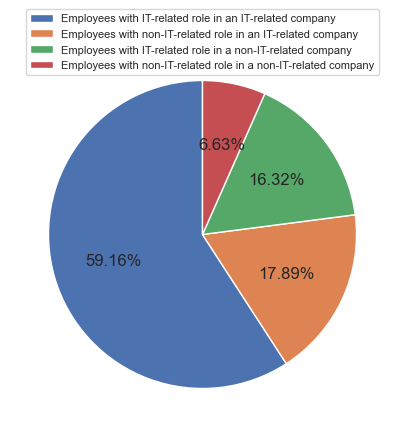

In [10]:
# Setting the style of the visuals
plt.style.use('fast')

# Starting fig1 and ax1 subplots objects
fig1, ax = plt.subplots(figsize=(15, 5))

# Plotting the pie chart
ax.pie(
    raw_2["Count"].to_list(),  # List of values
    startangle=90, 
    autopct='%1.2f%%',  # Showing 3 numbers after the decimal point 
    textprops={'fontsize': 12}  # Setting the size of the ratios 
)

# Setting the legend parameters
ax.legend(
    labels=raw_2["Categories"].to_list(),  # List of labels
    loc="upper center",  # Position of the legend
    bbox_to_anchor=(0.5, 1.1),
    fontsize=8)  # Size of the legend

# Plotting the figure
plt.show()

Since we consider only records of employees in IT-related roles, the remaining records shall be excluded.

In [11]:
# Selecting only IT-related roles
df = df[df["is_tech_role"] == 1]

# Dropping the is_tech_role column
df.drop(columns=["is_tech_role"], inplace=True)

# Printing the dataframe df
df.head()

,organization_size,is_tech_company,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,is_discussing_phd_with_employer_have_negative_consequences,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
4,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,More than 1000,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


#### 1.2. Handling the missing data
The dataset contains missing data that needs to be addressed by either dropping those records or properly filling in the missing values.

The first step involves dropping columns that are entirely empty and do not contribute any meaningful information.

In [13]:
# Initiating an empty list data_info 
data_info = []

# Gathering the attributes in one place 
for index, column in enumerate(df.columns):
    info = {
        'name': column,  # The name of the column 
        'empty_values': df[column].isna().sum(),  # The number of empty values in a column
        'unique_values': [
            df[column].unique().__len__() - 1 if df[column].isna().sum() != 0 else df[column].unique().__len__()][
            0],  # The number of unique values 
        'data_type': df[column].dtypes  # The data type of column
    }

    # Filtering to only include features containing empty values  
    data_info.append(info)

# Create a DataFrame from the gathered information
null_categories_data = pd.DataFrame(data_info).sort_values(by=['empty_values'], ascending=False)
null_categories_data

,name,empty_values,unique_values,data_type
20,is_productivity_impacted,865,0,object
14,have_medical_coverage_includes_mental_health_i...,865,0,float64
21,percentage_impacted,865,0,object
19,is_impacted_negatively_2,865,0,object
18,is_able_to_reveal_previous_mental_health_issue...,865,0,object
...,...,...,...,...
1,is_tech_company,0,2,float64
34,is_willing_to_bring_phi_in_interview,0,3,object
36,is_willing_to_bring_mhi_in_interview,0,3,object
38,is_being_identified_with_mhi_would_hurt_your_c...,0,5,object


In [14]:
# Storing these columns in a list called: to_be_deleted
to_be_deleted = list(null_categories_data[null_categories_data["empty_values"] == 865].iloc[:, 0])

# Using the list to_be_deleted to drop empty columns
df.drop(columns=to_be_deleted, axis=1, inplace=True)

# Drop text columns with no rewarding piece of information
df.drop(["why_or_why_not_bring_phi_in_interview", "why_or_why_not_bring_mhi_in_interview"], axis=1, inplace=True)

# Display the data
df.head()

,organization_size,is_tech_company,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,is_discussing_phd_with_employer_have_negative_consequences,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,6-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,6-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
4,6-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,More than 1000,1.0,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


Next, we'll run some transformations to standardize the data within each column along with their datatypes.

In [15]:
# Transforming this column from float64 into binary int64
df['is_tech_company'] = df['is_tech_company'].astype(int)

# Transforming this column from a text into int64
df[['is_aware_of_previous_negative_consequence_of_colleagues_with_mhi', 'diagnosed_by_professional']] = df[
    ['is_aware_of_previous_negative_consequence_of_colleagues_with_mhi', 'diagnosed_by_professional']].replace(
    ["Yes", "No"], [1, 0])

# Adjusting erroneous inout in the feature
df[["is_employer_takes_mh_seriously", "is_anonymity_protected_by_previous_employer"]] = df[
    ["is_employer_takes_mh_seriously", "is_anonymity_protected_by_previous_employer"]].replace('I don\'t know',
                                                                                               "I don't know")

# Setting the outliers to the median of the age column
df.loc[(df['age'] > 65), 'age'] = df.loc[(df['age'] < 18), 'age'] = df["age"].median()

#  Filling the missing values with the appropriate unique values
df['is_aware_mh_care_available'].fillna('I am not sure', inplace=True)

df['previously_observed_experienced_response_to_mhi'].fillna("Maybe/Not sure", inplace=True)

df['is_less_encouraged_to_reveal_mhi'].fillna("Maybe", inplace=True)

# Print the dataframe
df.head()

,organization_size,is_tech_company,is_mh_benefits_provided,is_aware_mh_care_available,is_mh_discussed_by_employer,is_mh_resources_provided_by_employer,is_anonymity_protected,how_is_asking_for_medical_leave_due_to_mhi,is_discussing_mhd_with_employer_have_negative_consequences,is_discussing_phd_with_employer_have_negative_consequences,...,is_mhi_interferes_with_your_work_when_treated_effectively,is_mhi_does_not_interfere_with_your_work_when_treated_effectively,age,gender,country_of_residency,us_state_residency,country_of_work,us_state_work,role_description,is_remote
0,26-100,1,Not eligible for coverage / N/A,I am not sure,No,No,I don't know,Very easy,No,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,6-25,1,No,Yes,Yes,Yes,Yes,Somewhat easy,No,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,6-25,1,No,I am not sure,No,No,I don't know,Neither easy nor difficult,Maybe,No,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
4,6-25,0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,Maybe,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
5,More than 1000,1,Yes,I am not sure,No,Yes,Yes,Somewhat easy,Yes,Yes,...,Not applicable to me,Often,42,Male,United Kingdom,NaN,United Kingdom,NaN,DevOps/SysAdmin|Support|Back-end Developer|Fro...,Sometimes


In [16]:
# Reassigning the values to Male, Female, or Other
df['gender'].replace(
    ['male', 'm', 'M', 'Male (cis)', 'cisdude', 'Dude', 'Male.', 'Cis male', 'Cis Male', 'cis male', 'cis man', 'mail',
     'Male (trans, FtM)', 'Male/genderqueer', 'Malr', 'Man', 'Sex is male', 'man', 'male ', 'M|', 'Male ', 'MALE',
     'Male (trans, FtM)',
     'I\'m a man why didn\'t you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? '
     ],
    'Male', inplace=True)

df['gender'].replace(
    ['Female', 'female', 'I identify as female.', 'female ', 'Female assigned at birth ', 'Cis female ', 'F', 'Woman',
     'Transitioned, M2F', 'Female or Multi-Gender Femme', 'woman', 'female/woman', 'Cisgender Female', 'fm', 'f',
     'fem', ' Female', 'Cis-woman', 'Female ', 'Female (props for making this a freeform field, though)',
     ],
    'Female', inplace=True)

df['gender'].replace(
    ['Genderfluid (born female)', 'female-bodied; no feelings about gender', 'non-binary', 'AFAB', 'Agender',
     'genderqueer',
     'Genderflux demi-girl', 'mtf', 'Genderqueer', 'Transgender woman', 'Other/Transfeminine', 'human', 'Queer',
     'Unicorn',
     'Androgynous', 'Fluid', 'nb masculine', 'Genderfluid', 'none of your business', 'Bigender', 'Enby',
     'genderqueer woman',
     'Nonbinary', 'male 9:1 female, roughly', 'Human', np.nan
     ],
    'Other', inplace=True)

# Overview of the transformed data
df["gender"].value_counts()

gender
Male      672
Female    170
Other      23
Name: count, dtype: int64

In [17]:
# Initiating an empty list data_info 
new_info = []

# Gathering the attributes in one place 
for index, column in enumerate(df.columns):
    info = {
        'name': column,  # The name of the column 
        'empty_values': df[column].isna().sum(),  # The number of empty values in a column
        'unique_values': [
            df[column].unique().__len__() - 1 if df[column].isna().sum() != 0 else df[column].unique().__len__()][
            0],  # The number of unique values 
        'data_type': df[column].dtypes  # The data type of column
    }

    # Filtering to only include features containing empty values  
    new_info.append(info)

# Create a DataFrame from the gathered information
categories_data = pd.DataFrame(new_info).sort_values(by=['empty_values'], ascending=False)
categories_data

,name,empty_values,unique_values,data_type
37,suspected_conditions,657,74,object
36,known_conditions,536,83,object
39,diagnosed_conditions_by_professional,443,70,object
46,us_state_residency,333,45,object
48,us_state_work,327,45,object
25,is_aware_of_previous_negative_consequence_of_c...,104,3,object
16,is_aware_mh_options_by_previous_employer,104,4,object
24,is_previous_employer_takes_mh_seriously,104,4,object
23,is_willing_to_discuss_mhi_with_previous_direct...,104,4,object
22,is_willing_to_discuss_mhi_with_previous_collea...,104,3,object


Standardization can be applied to some columns in our dataset. Organization_size is a good candidate for this process.

To ensure data quality, Data transformation is applied on the data. 

Due to the existence of unreasonable outliers in the age column, any value outside the interval 18 and 65 is reset to the median.

In [0]:
rico = pd.DataFrame(df['age'].value_counts()).reset_index()

# 
sns.boxplot(data=rico, y='age')

plt.show()

In [ ]:
df

In [ ]:
# Extracting the unreasonable empty values 
df.loc[(df["is_having_mhd"] != 'No') & (df["known_conditions"].isna()) & (df["suspected_conditions"].isna()), "is_having_mhd"] = "No"


# Displaying the data 
df[(df["diagnosed_by_professional"] == 1) & (df["diagnosed_conditions_by_professional"].isna())]
# replace the shit with 0

In [ ]:
df[(df["diagnosed_by_professional"] == 1) & (df["diagnosed_conditions_by_professional"].isna())]
# replace the shit with 0

In [ ]:
reason = df[(df["diagnosed_by_professional"] == 1) 
            & 
            (df["diagnosed_conditions_by_professional"].isna())
]

reason

In [ ]:
def conditions_counter(column_name):
    """
    :param column_name: The name of column desired
    :return: a Dataframe containing the conditions and the number of their occurrences in the column
    """

    # Creating the list of unique values excluding empty values
    a_list = pd.DataFrame(data[column_name].value_counts()).reset_index().iloc[:, 0].to_list()

    # Creating an empty dictionary
    a_dict = dict()

    # Initiating a for-loop
    for element in a_list:
        # Inspecting the existence of a character 
        if '|' in element:
            elements = element.split("|")
            # If the condition is met
            for unit in elements:
                # Iterating each unit  
                if unit in a_dict:
                    a_dict[unit] += 1  # Augment the number if it does exist
                else:
                    a_dict[unit] = 1  # Set the number to 1 if a new occurrence is found
        else:
            if element in a_dict:
                a_dict[element] += 1
            else:
                a_dict[element] = 1

    # Turning the data stored in the dictionary into a dataframe
    dframe = pd.DataFrame(list(a_dict.items()), columns=['Condition', 'Count'])

    # The final output of the function
    return dframe

In [ ]:
df

In [ ]:
known_conditions = conditions_counter("known_conditions") 
known_conditions

In [ ]:
# Including the Asperger's in Autism Spectrum condition
df['known_conditions'].replace(
    ["Asperges", "Autism (Asperger's)"],
    'Autism Spectrum', inplace=True)

# Formatting the Autism Spectrum Disorder condition
df['known_conditions'].replace(
    ["Autism", "Autism Spectrum Disorder", "Autism spectrum disorder"],
    "Autism Spectrum Disorder", inplace=True)

# This description seems to encompass symptoms related to attention-related challenges, 
# potentially resembling symptoms of ADHD or sensory processing issues
df['known_conditions'].replace(
    "Combination of physical impairment (strongly near-sighted) with a possibly mental one (MCD / \"ADHD\", though its actually a stimulus filtering impairment)",
    "Attention Deficit Hyperactivity Disorder", inplace=True)

# Including Sexual addiction into Addictive Disorder condition 
df['known_conditions'].replace("Sexual addiction", "Addictive Disorder", inplace=True)

# Including Burnout into Stress Response Syndromes
df['known_conditions'].replace("Burn out", "Stress Response Syndromes", inplace=True)

# Putting the unconfirmed conditions in the suspected conditions column
# df.loc[df["diagnosed_conditions"] == "I haven't been formally diagnosed, so I felt uncomfortable answering, but Social Anxiety and Depression.", "suspected_conditions"] = "Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)"


In [ ]:
known_conditions_2 = conditions_counter("known_conditions")

In [ ]:
known_conditions_2

In [ ]:
print(f"The data is formed through {df.shape[1]} columns/features and {df.shape[0]} rows/records.")

In [ ]:
# Save the cleansed dataset in the respective directory
df.to_csv(f"{path}/data/data_v2.0.csv")

### 2.4 Columns 40 to 42
There's a wide belief that mental health issues can threaten the career, and it shouldn't be discussed with anybody. In the nex few columns, we try to test the belief through what the respondents have said.

In [ ]:
# Saving the columns names in a list
columns = [
    "Do you feel that being identified as a person with a mental health issue would hurt your career?",
    "Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?",
    "How willing would you be to share with friends and family that you have a mental illness?"
]

# Saving the prospected charts' titles in a list
titles = [
    "Negative impact on the career",
    "Low status probability",
    "Openness about mental health issue"
]

# Create a figure and three subplots
fig3, axes = plt.subplots(1, 3, figsize=(30, 10))

# Starting the for loop
for index, column in enumerate(columns):
    # Setting the dictionary with the relevant details
    the_dict = data[column].value_counts().to_dict()

    # Solving the categories and their values
    categories = list(the_dict.keys())
    values = [the_dict[category] for category in categories]  # Corrected

    # Plotting the chart without labels and percentages
    axes[index].pie(values, labels=None, autopct='%1.1f%%', textprops={'fontsize': 22}, startangle=90)
    axes[index].set_title(titles[index])

    # Adding legend under each chart with extra space at the bottom
    axes[index].legend(categories, loc='upper center', bbox_to_anchor=(1, 1))

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

__Insights :__
- It's made obvious that there is a tendency to believe that having mental health issues has a negative impact on the career and may lower an employee's status among its co-workers or at least uncertainty on its actual effect.
- On the other hand, there is an obvious tendency to discuss mental health issues among friends and family.

### 2.5 Columns 43 to 44

The next two columns address another aspect which is the impact of previous experience/observation of a wrongly handled mental health issue by current/previous employer. There is a noticeable number of empty values, although we'll make sure to work with the data we possess. 

In [ ]:
# Setting a subset with the two columns called new_df
new_df = data[[
    "Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
    "Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?"
]].copy()

# Plotting the bar plot using seaborn
sns.countplot(
    x="Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?",
    hue="Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?",
    data=new_df)

# Setting labels and legend
plt.xlabel("Previous observation/experience of badly handled mental health issue")
plt.ylabel("Number of respondents")
plt.legend(title="Does it impact?")

# Showing the chart
plt.show()

__Insights__ : 
- There is an important number of empty values present in these columns which can't be known due to which reason.
- The respondents who have experienced/observed badly handled mental health issues are more likely to never reveal their mental health issues if they ever suffer one. 

### 2.6 Columns 45 to 46

In the next two columns, we try to relate the mental health issues with the family history of an employee.

In [ ]:
# Setting a subset with the two columns called new_df
new_df = data[[
    "Do you have a family history of mental illness?", 
    "Have you had a mental health disorder in the past?"
]].copy()

# Plotting the bar plot using seaborn
sns.countplot(
    x="Do you have a family history of mental illness?",
    hue="Have you had a mental health disorder in the past?",
    data=new_df)

# Setting labels and legend
plt.xlabel("Family's History of Mental Health Issues")
plt.ylabel("Number of respondents")
plt.legend(title="Previous mental health issues")

# Showing the chart
plt.show()

__Insights__ : 
- Employees who have family health issues have gone through some previous mental health issues.
- Employees who have NO family health issues don't have any past mental health illness.

Next, we observe how the opinions are distributed in the matter of revealing both physical and mental health issues.

In [ ]:
# Performing aggregations on the columns, then saving them into dictionaries
phi = data[
    "Would you be willing to bring up a physical health issue with a potential employer in an interview?"].value_counts().to_dict()
mhi = data[
    "Would you bring up a mental health issue with a potential employer in an interview?"].value_counts().to_dict()

# Setting the components for the chart
categories = ['Yes', 'Maybe', 'No']
phi_values = [phi['Yes'], phi['Maybe'], phi['No']]
mhi_values = [mhi['Yes'], mhi['Maybe'], mhi['No']]

# Set the width of the bars
bar_width = 0.35

# Create figure and axis
fig, ax = plt.subplots()

# Plot the first set of bars
bar1 = ax.bar(np.arange(len(categories)), phi_values, bar_width, color='blue', label='Physical health issues')

# Calculate the position for the second set of bars
bar2_position = np.arange(len(categories)) + bar_width

# Plot the second set of bars
bar2 = ax.bar(bar2_position, mhi_values, bar_width, color='red', label='Mental health issues')

# Set labels and ticks
ax.set_xlabel('Categories')
ax.set_ylabel('Count')
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories)

# Add legend
bars = [bar1, bar2]
labels = [bar.get_label() for bar in bars]
ax.legend(bars, labels)

# Show plot
plt.title('Intention to reveal physical/mental health issues')
plt.show()

__Insights :__
- There is a nuanced spread of responses to revealing physical health issues, with a slight advantage towards uncertainty and disagreement, while still encompassing a proportion of agreement.
- A notable prevalence of negative sentiment among respondents to reveal mental health issues with a discernible emphasis on disagreement and uncertainty compared to agreement.
- The reasons for all choices are different as their count goes above 1000 entry.

In [ ]:
# Create a new DataFrame for counting unique values and their counts from both columns
is_affected = pd.DataFrame(data[
                               "If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?"].value_counts()).reset_index()
is_not_affected = pd.DataFrame(data[
                                   "If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?"
                               ].value_counts()).reset_index()

is_affected.columns = is_not_affected.columns = ["Categories", "Count"]

# Merging the data frames into final_df
merged_df = pd.merge(
        is_affected,
        is_not_affected,
        on='Categories', how='outer',
        suffixes=('_affected', '_not_affecting'))

# Melt the DataFrame to create a "long-form" representation
melted = pd.melt(merged_df, id_vars='Categories', var_name='Condition', value_name='Count')

# Plot side-by-side bars using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=melted, x='Categories', y='Count', hue='Condition')
plt.title('Impact of Mental Health Issue on Work')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

In [ ]:
from geopy.geocoders import Nominatim

def get_state_coordinates(state):
    geo_locator = Nominatim(user_agent="my_geocoder")
    location = geo_locator.geocode(state + ", USA")
    if location:
        return location.latitude, location.longitude
    else:
        return None

In [ ]:
coordinates_work = {}

for element in geo_employee_work["States"].to_list() :
    value = get_state_coordinates(element)
    coordinates_work[element] = value

coordinates_work

In [ ]:
coordinates_residency ={}

for element in geo_employee_residency["States"].to_list() :
    value = get_state_coordinates(element)
    coordinates_residency[element] = value

coordinates_residency